TP olist
Open folders

In [7]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [8]:
customers= pd.read_csv('olist_customers_dataset.csv')
geolocalisation= pd.read_csv('olist_geolocation_dataset.csv')
order_items= pd.read_csv('olist_order_items_dataset.csv')
order_payements= pd.read_csv('olist_order_payments_dataset.csv')
order_reviews= pd.read_csv('olist_order_reviews_dataset.csv')
orders= pd.read_csv('olist_orders_dataset.csv')
products= pd.read_csv('olist_products_dataset.csv')
sellers= pd.read_csv('olist_sellers_dataset.csv')
name_translation= pd.read_csv('product_category_name_translation.csv')


In [9]:
dataframes = [
    customers,
    geolocalisation,
    order_items,
    order_payements,
    order_reviews,
    orders,
    products,
    sellers,
    name_translation
]


In [10]:
for i in dataframes:
    print(i.columns)

Index(['customer_id', 'customer_unique_id', 'customer_zip_code_prefix',
       'customer_city', 'customer_state'],
      dtype='object')
Index(['geolocation_zip_code_prefix', 'geolocation_lat', 'geolocation_lng',
       'geolocation_city', 'geolocation_state'],
      dtype='object')
Index(['order_id', 'order_item_id', 'product_id', 'seller_id',
       'shipping_limit_date', 'price', 'freight_value'],
      dtype='object')
Index(['order_id', 'payment_sequential', 'payment_type',
       'payment_installments', 'payment_value'],
      dtype='object')
Index(['review_id', 'order_id', 'review_score', 'review_comment_title',
       'review_comment_message', 'review_creation_date',
       'review_answer_timestamp'],
      dtype='object')
Index(['order_id', 'customer_id', 'order_status', 'order_purchase_timestamp',
       'order_approved_at', 'order_delivered_carrier_date',
       'order_delivered_customer_date', 'order_estimated_delivery_date'],
      dtype='object')
Index(['product_id', 'prod

In [11]:
"""
filtered_reviews = order_reviews[order_reviews["review_comment_message_fr"].str.contains("manque", case=False, na=False)]

filtered_reviews
"""

'\nfiltered_reviews = order_reviews[order_reviews["review_comment_message_fr"].str.contains("manque", case=False, na=False)]\n\nfiltered_reviews\n'

In [12]:
order_reviews["review_score"].info()

<class 'pandas.core.series.Series'>
RangeIndex: 99224 entries, 0 to 99223
Series name: review_score
Non-Null Count  Dtype
--------------  -----
99224 non-null  int64
dtypes: int64(1)
memory usage: 775.3 KB


In [13]:
one_score_reviews = order_reviews[(order_reviews["review_score"] == 1) & (order_reviews["review_comment_message"].notna())
]
one_score_reviews["review_comment_message"].info()
one_score_reviews["review_comment_message"]


<class 'pandas.core.series.Series'>
Index: 8745 entries, 19 to 99223
Series name: review_comment_message
Non-Null Count  Dtype 
--------------  ----- 
8745 non-null   object
dtypes: object(1)
memory usage: 136.6+ KB


19                                                 Péssimo
29                     Não gostei ! Comprei gato por lebre
32       Sempre compro pela Internet e a entrega ocorre...
39                            Nada de chegar o meu pedido.
51       recebi somente 1 controle Midea Split ESTILO.\...
                               ...                        
99094    Gostaria de saber porque meu produto ainda não...
99141    Ate hoje dia 21/10/2017 o pedido não foi entre...
99155    Eu recebi o seguinte email e preciso saber com...
99169    Boa tarde. \r\nNão recebo todos os produtos fa...
99223    meu produto chegou e ja tenho que devolver, po...
Name: review_comment_message, Length: 8745, dtype: object

In [14]:
one_score_reviews["review_comment_message"].iloc[0]

'Péssimo'

In [15]:
"""
from deep_translator import GoogleTranslator

# Fonction pour traduire le texte en français
def translate_text(text):
    if isinstance(text, str):  # Vérifier si c'est bien une chaîne de caractères
        return GoogleTranslator(target='fr').translate(text)
    return text  # Si ce n'est pas du texte, on le retourne tel quel

# Appliquer la traduction à tout le Data
one_score_reviews["review_comment_message"].map(translate_text)
"""

'\nfrom deep_translator import GoogleTranslator\n\n# Fonction pour traduire le texte en français\ndef translate_text(text):\n    if isinstance(text, str):  # Vérifier si c\'est bien une chaîne de caractères\n        return GoogleTranslator(target=\'fr\').translate(text)\n    return text  # Si ce n\'est pas du texte, on le retourne tel quel\n\n# Appliquer la traduction à tout le Data\none_score_reviews["review_comment_message"].map(translate_text)\n'

In [16]:
order_counts = order_items["order_id"].value_counts().reset_index()
order_counts.groupby("order_id")

In [17]:
merged_df = order_reviews.merge(order_counts, on="order_id", how="left")

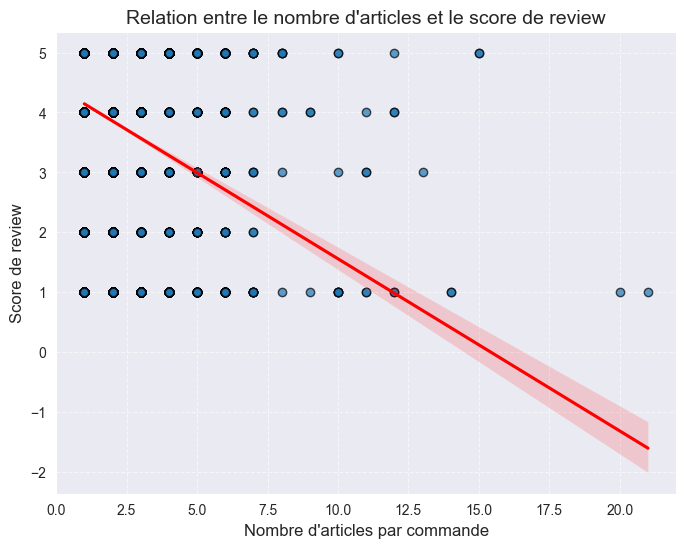

In [18]:

plt.figure(figsize=(8, 6))
sns.regplot(
    data=merged_df, 
    x='count', 
    y='review_score', 
    ci=95,  # Intervalle de confiance à 95%
    scatter_kws={'alpha': 0.7, 'edgecolor': 'k'},  # Options pour les points
    line_kws={'color': 'red'}  # Couleur de la ligne de régression
)
plt.xlabel("Nombre d'articles par commande", fontsize=12)
plt.ylabel("Score de review", fontsize=12)
plt.title("Relation entre le nombre d'articles et le score de review", fontsize=14)
plt.grid(True, linestyle="--", alpha=0.6)
plt.show()

In [19]:
correlation = merged_df['count'].corr(merged_df['review_score'])
correlation

np.float64(-0.1155670537589946)

<Axes: xlabel='review_score', ylabel='count'>

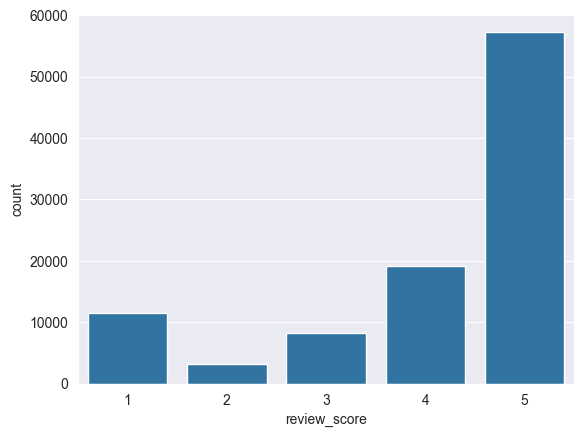

In [20]:
sns.countplot(data = order_reviews, x='review_score')

In [39]:
merged_payment_by_rating = order_reviews.merge(order_payements, on="order_id", how="left")
merged_payment_by_rating['payment_value'] = merged_payment_by_rating['payment_value'].fillna(0)
quartiles_np = np.percentile(merged_payment_by_rating['payment_value'], [0, 25, 50, 75, 100])
quartiles_np

array([    0.  ,    56.78,    99.95,   171.49, 13664.08])

C:\Users\maxime\AppData\Local\Temp\ipykernel_10660\3166602234.py:2: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(


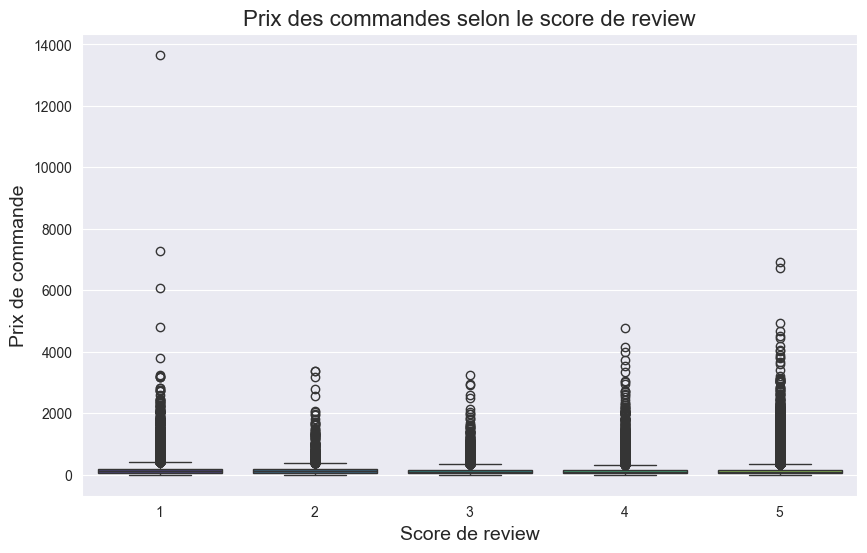

In [42]:

plt.figure(figsize=(10, 6))
sns.boxplot(
    x='review_score',
    y='payment_value', 
    data=merged_payment_by_rating, 
    palette='viridis'
)
plt.title("Prix des commandes selon le score de review", fontsize=16)
plt.xlabel("Score de review", fontsize=14)
plt.ylabel("Prix de commande", fontsize=14)
plt.show()


In [52]:
filtered_df = merged_payment_by_rating[merged_payment_by_rating['payment_value'] < 200]
correlation = filtered_df['review_score'].corr(filtered_df['payment_value'])
correlation

np.float64(-0.025959344340745205)

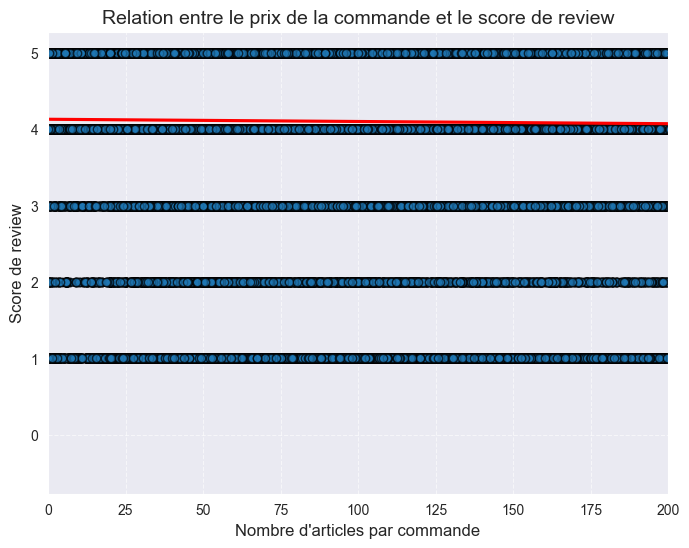

In [51]:

plt.figure(figsize=(8, 6))
sns.regplot(
    data=merged_payment_by_rating, 
    x='payment_value', 
    y='review_score', 
    ci=95,  # Intervalle de confiance à 95%
    scatter_kws={'alpha': 0.7, 'edgecolor': 'k'},  # Options pour les points
    line_kws={'color': 'red'}  # Couleur de la ligne de régression
)
plt.xlabel("Nombre d'articles par commande", fontsize=12)
plt.ylabel("Score de review", fontsize=12)
plt.title("Relation entre le prix de la commande et le score de review", fontsize=14)
plt.grid(True, linestyle="--", alpha=0.6)
plt.xlim(0,200)
plt.show()